# Using ImgLyb and ImgLib2 with scikit-image

Let's get started by assigning sensible defaults to required environment variables via importing the ImgLyb goodies...

In [1]:
import os
conda_dir = os.getenv('CONDA_DIR')
if conda_dir is not None:
    if os.getenv('IMGLYB_JAR') is None:
        imglyb_dir = conda_dir + '/share/imglyb/'
        os.environ['IMGLYB_JAR'] = imglyb_dir + os.listdir(imglyb_dir)[0]
    if os.getenv('PYJNIUS_JAR') is None:
        pyjnius_dir = conda_dir + '/share/pyjnius/'
        os.environ['PYJNIUS_JAR'] = pyjnius_dir + os.listdir(pyjnius_dir)[0]
    if os.getenv('JAVA_HOME') is None:
        os.environ['JAVA_HOME'] = conda_dir

Then, we'll set up ImgLyb.

In [2]:
import imglyb
from jnius import autoclass

What helpful functions do we have?

In [3]:
list(filter(lambda func: not func.startswith('_'), dir(imglyb)))

['config',
 'print_function',
 'sys',
 'to_imglib',
 'to_imglib_argb',
 'to_numpy',
 'util']

Next, let's quickly define some utility functions.

In [4]:
from matplotlib import pyplot as plt
def show(image):
    plt.imshow(image, interpolation='nearest')
    plt.show()

Now, on to the fun stuff!

Let's open an image using scikit-image and get going!

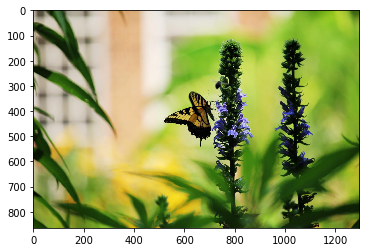

In [5]:
from skimage import io
url = 'https://github.com/hanslovsky/imglyb-examples/raw/master/resources/butterfly_small.jpg'
img = io.imread(url)
show(img)

How about applying a simple scikit-image filter?  Let's try the Sobel filter to start...

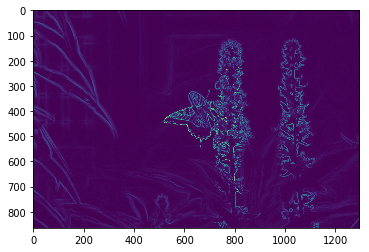

In [6]:
from skimage import filters
import numpy as np
avg = np.mean(img, axis=2)
gradient = filters.sobel(avg)
show(gradient)

It's time to mix and match with ImgLib2 by calling the Euclidean Distance Transform (EDT).

But first thing's first... we need to get some imports.

In [7]:
import multiprocessing
cpu_count = multiprocessing.cpu_count()

Executors = autoclass('java.util.concurrent.Executors')
DistanceTransform = autoclass('net.imglib2.algorithm.morphology.distance.DistanceTransform')
DISTANCE_TYPE = autoclass('net.imglib2.algorithm.morphology.distance.DistanceTransform$DISTANCE_TYPE')
Views = autoclass('net.imglib2.view.Views')

And now the fun stuff:

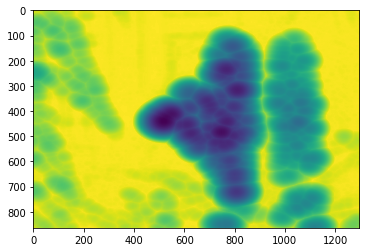

In [8]:
dt = np.zeros(avg.shape, dtype=avg.dtype)
DistanceTransform.transform( \
    Views.extendBorder(imglyb.to_imglib(-gradient)), \
    imglyb.to_imglib(dt), \
    DISTANCE_TYPE.EUCLIDIAN, \
    Executors.newFixedThreadPool(cpu_count), \
    cpu_count, 1e-2, 2e-2)
show(dt)